<a href="https://colab.research.google.com/github/Praveen5612/ML_Algorithams/blob/main/Apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mlxtend

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
data = pd.read_csv('/content/Wholesale customers data.csv')

In [ ]:
data.shape

(440, 8)

In [ ]:
df = data.drop(['Channel','Region'] ,axis=1)


In [ ]:
df.shape

(440, 6)

In [ ]:
# Old way (deprecated)
# df = basket.applymap(lambda x: 1 if x > 0 else 0)

# New recommended way
df = basket.gt(0).astype(int)
df = df.astype(bool)


In [ ]:
df.head()

Item,Delicassen,Detergents_Paper,Fresh,Frozen,Grocery,Milk
Transaction,,,,,,
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True


In [ ]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)
print(frequent_itemsets)

    support                                           itemsets
0       1.0                                       (Delicassen)
1       1.0                                 (Detergents_Paper)
2       1.0                                            (Fresh)
3       1.0                                           (Frozen)
4       1.0                                          (Grocery)
..      ...                                                ...
58      1.0  (Grocery, Detergents_Paper, Milk, Delicassen, ...
59      1.0  (Grocery, Detergents_Paper, Frozen, Milk, Deli...
60      1.0         (Grocery, Frozen, Milk, Delicassen, Fresh)
61      1.0   (Grocery, Detergents_Paper, Frozen, Milk, Fresh)
62      1.0  (Grocery, Detergents_Paper, Frozen, Milk, Deli...

[63 rows x 2 columns]


In [ ]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.dropna(inplace=True)


print(rules)

            antecedents                                        consequents  \
0    (Detergents_Paper)                                       (Delicassen)   
1          (Delicassen)                                 (Detergents_Paper)   
2          (Delicassen)                                            (Fresh)   
3               (Fresh)                                       (Delicassen)   
4          (Delicassen)                                           (Frozen)   
..                  ...                                                ...   
597  (Detergents_Paper)         (Grocery, Frozen, Milk, Delicassen, Fresh)   
598            (Frozen)  (Grocery, Detergents_Paper, Milk, Delicassen, ...   
599              (Milk)  (Grocery, Detergents_Paper, Frozen, Delicassen...   
600        (Delicassen)   (Grocery, Detergents_Paper, Frozen, Milk, Fresh)   
601             (Fresh)  (Grocery, Detergents_Paper, Frozen, Milk, Deli...   

     antecedent support  consequent support  support  confidenc

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


In [ ]:
print("Total rules generated:", len(rules))
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


Total rules generated: 602
          antecedents         consequents  support  confidence  lift
0  (Detergents_Paper)        (Delicassen)      1.0         1.0   1.0
1        (Delicassen)  (Detergents_Paper)      1.0         1.0   1.0
2        (Delicassen)             (Fresh)      1.0         1.0   1.0
3             (Fresh)        (Delicassen)      1.0         1.0   1.0
4        (Delicassen)            (Frozen)      1.0         1.0   1.0
5            (Frozen)        (Delicassen)      1.0         1.0   1.0
6           (Grocery)        (Delicassen)      1.0         1.0   1.0
7        (Delicassen)           (Grocery)      1.0         1.0   1.0
8              (Milk)        (Delicassen)      1.0         1.0   1.0
9        (Delicassen)              (Milk)      1.0         1.0   1.0


In [ ]:
# Example: confidence > 0.6 and lift > 1.2
strong_rules = rules[(rules['confidence'] > 0.3) & (rules['lift'] > 1.0)]

# Sort by lift
strong_rules = strong_rules.sort_values(by='lift', ascending=False)

print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


            antecedents                                        consequents  \
0    (Detergents_Paper)                                       (Delicassen)   
1          (Delicassen)                                 (Detergents_Paper)   
2          (Delicassen)                                            (Fresh)   
3               (Fresh)                                       (Delicassen)   
4          (Delicassen)                                           (Frozen)   
..                  ...                                                ...   
597  (Detergents_Paper)         (Grocery, Frozen, Milk, Delicassen, Fresh)   
598            (Frozen)  (Grocery, Detergents_Paper, Milk, Delicassen, ...   
599              (Milk)  (Grocery, Detergents_Paper, Frozen, Delicassen...   
600        (Delicassen)   (Grocery, Detergents_Paper, Frozen, Milk, Fresh)   
601             (Fresh)  (Grocery, Detergents_Paper, Frozen, Milk, Deli...   

     support  confidence  lift  
0        1.0         1.0   1.0

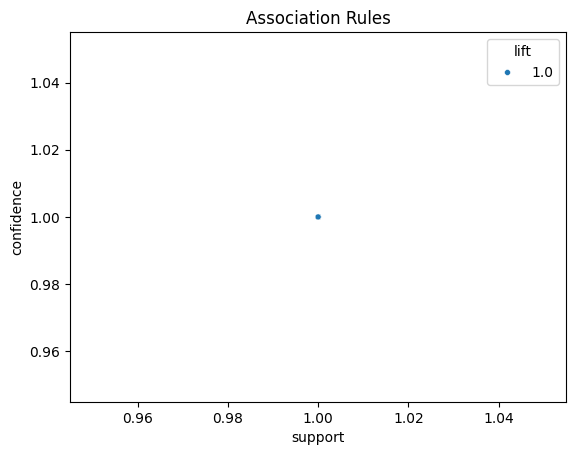

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of support vs confidence
sns.scatterplot(x='support', y='confidence', size='lift', hue='lift', data=rules)
plt.title("Association Rules")
plt.show()
